In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222691, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


(222690, 12)


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337,-25.514801
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157,-25.514740
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125,-25.514736
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025,-25.514584
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098,-25.514740


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70127  0.70137         0.70111    17    2   
2020-01-01 17:05:00  0.70127  0.70086  0.70139         0.70112    17    2   
2020-01-01 17:10:00  0.70113  0.70093  0.70132         0.70088    17    2   
2020-01-01 17:15:00  0.70112  0.70084  0.70126         0.70114    17    2   
2020-01-01 17:20:00  0.70088  0.70078  0.70159         0.70095    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00003   0.701320  0.00010    0.701337 -25.514801  
2020-01-01 17:05:00     1   0.00016   0.701125  0.00053    0.701157 -25.514740  
2020-01-01 17:10:00     1   0.00001   0.701125  0.00039    0.701125 -25.514736  
2020-01-01 17:15:00     1   0.00024   0.701050  0.00042

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178152
178152
22000
22000
22538
22538


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178152, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178127, 24, 12)
(21975, 24, 12)
(22513, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178127, 1)
(21975, 1)
(22513, 1)


array([[0.60305166],
       [0.6032524 ],
       [0.60252976],
       ...,
       [0.632082  ],
       [0.63103795],
       [0.63147974]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.632082  , 0.63103795,
       0.63147974], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 328.1355 - mae: 3.5633 - mse: 328.1355 - root_mean_squared_error: 18.1145 - mape: 6946.5991
Epoch 1: val_mse improved from inf to 0.08995, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 354s 735ms/step - loss: 328.1355 - mae: 3.5633 - mse: 328.1355 - root_mean_squared_error: 18.1145 - mape: 6946.5991 - val_loss: 0.0900 - val_mae: 0.2627 - val_mse: 0.0900 - val_root_mean_squared_error: 0.2999 - val_mape: 30741.9863
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0306 - mae: 0.1348 - mse: 0.0306 - root_mean_squared_error: 0.1749 - mape: 3954.8225
Epoch 2: val_mse improved from 0.08995 to 0.08506, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 337s 729ms/step - loss: 0.0306 - mae: 0.1348 - mse: 0.0306 - root_mean_squared_error: 0.1749 - mape: 3954.8225 - val_loss: 0.0851 - val_mae: 0.2557 - val_mse: 0.0851 - val_root_mean_squared_error: 0.2916 - val_mape: 30189.0117
Epoch 3/60
463/463 [==============================] - ETA: 0s - loss: 0.0305 - mae: 0.1347 - mse: 0.0305 - root_mean_squared_error: 0.1747 - mape: 4320.7109
Epoch 3: val_mse improved from 0.08506 to 0.08504, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 336s 726ms/step - loss: 0.0305 - mae: 0.1347 - mse: 0.0305 - root_mean_squared_error: 0.1747 - mape: 4320.7109 - val_loss: 0.0850 - val_mae: 0.2557 - val_mse: 0.0850 - val_root_mean_squared_error: 0.2916 - val_mape: 30177.3379
Epoch 4/60
463/463 [==============================] - ETA: 0s - loss: 0.0304 - mae: 0.1346 - mse: 0.0304 - root_mean_squared_error: 0.1744 - mape: 3862.2639
Epoch 4: val_mse did not improve from 0.08504
463/463 [==============================] - 293s 633ms/step - loss: 0.0304 - mae: 0.1346 - mse: 0.0304 - root_mean_squared_error: 0.1744 - mape: 3862.2639 - val_loss: 0.0853 - val_mae: 0.2560 - val_mse: 0.0853 - val_root_mean_squared_error: 0.2920 - val_mape: 30188.7051
Epoch 5/60
463/463 [==============================] - ETA: 0s - loss: 0.0303 - mae: 0.1343 - mse: 0.0303 - root_mean_squared_error: 0.1742 - mape: 3957.2874
Epoch 5: val_mse improved from 0.08504 to 0.08466, saving model to /content/drive/MyDrive/modelweigh

463/463 [==============================] - 335s 723ms/step - loss: 0.0303 - mae: 0.1343 - mse: 0.0303 - root_mean_squared_error: 0.1742 - mape: 3957.2874 - val_loss: 0.0847 - val_mae: 0.2552 - val_mse: 0.0847 - val_root_mean_squared_error: 0.2910 - val_mape: 30099.9844
Epoch 6/60
463/463 [==============================] - ETA: 0s - loss: 0.0303 - mae: 0.1342 - mse: 0.0303 - root_mean_squared_error: 0.1740 - mape: 3859.7607
Epoch 6: val_mse improved from 0.08466 to 0.08428, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 334s 721ms/step - loss: 0.0303 - mae: 0.1342 - mse: 0.0303 - root_mean_squared_error: 0.1740 - mape: 3859.7607 - val_loss: 0.0843 - val_mae: 0.2546 - val_mse: 0.0843 - val_root_mean_squared_error: 0.2903 - val_mape: 30030.5469
Epoch 7/60
463/463 [==============================] - ETA: 0s - loss: 0.0301 - mae: 0.1338 - mse: 0.0301 - root_mean_squared_error: 0.1734 - mape: 3698.5508
Epoch 7: val_mse did not improve from 0.08428
463/463 [==============================] - 289s 624ms/step - loss: 0.0301 - mae: 0.1338 - mse: 0.0301 - root_mean_squared_error: 0.1734 - mape: 3698.5508 - val_loss: 0.0844 - val_mae: 0.2549 - val_mse: 0.0844 - val_root_mean_squared_error: 0.2906 - val_mape: 30018.8164
Epoch 8/60
463/463 [==============================] - ETA: 0s - loss: 0.0299 - mae: 0.1331 - mse: 0.0299 - root_mean_squared_error: 0.1728 - mape: 3863.2937
Epoch 8: val_mse improved from 0.08428 to 0.08387, saving model to /content/drive/MyDrive/modelweigh

463/463 [==============================] - 324s 699ms/step - loss: 0.0299 - mae: 0.1331 - mse: 0.0299 - root_mean_squared_error: 0.1728 - mape: 3863.2937 - val_loss: 0.0839 - val_mae: 0.2541 - val_mse: 0.0839 - val_root_mean_squared_error: 0.2896 - val_mape: 29918.9375
Epoch 9/60
463/463 [==============================] - ETA: 0s - loss: 0.0296 - mae: 0.1326 - mse: 0.0296 - root_mean_squared_error: 0.1719 - mape: 4067.3503
Epoch 9: val_mse did not improve from 0.08387
463/463 [==============================] - 283s 611ms/step - loss: 0.0296 - mae: 0.1326 - mse: 0.0296 - root_mean_squared_error: 0.1719 - mape: 4067.3503 - val_loss: 0.0843 - val_mae: 0.2547 - val_mse: 0.0843 - val_root_mean_squared_error: 0.2903 - val_mape: 29921.3828
Epoch 10/60
463/463 [==============================] - ETA: 0s - loss: 0.0293 - mae: 0.1318 - mse: 0.0293 - root_mean_squared_error: 0.1711 - mape: 4190.8325
Epoch 10: val_mse improved from 0.08387 to 0.08158, saving model to /content/drive/MyDrive/modelwei

463/463 [==============================] - 323s 698ms/step - loss: 0.0293 - mae: 0.1318 - mse: 0.0293 - root_mean_squared_error: 0.1711 - mape: 4190.8325 - val_loss: 0.0816 - val_mae: 0.2507 - val_mse: 0.0816 - val_root_mean_squared_error: 0.2856 - val_mape: 29553.8887
Epoch 11/60
463/463 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1306 - mse: 0.0287 - root_mean_squared_error: 0.1696 - mape: 3588.9016
Epoch 11: val_mse improved from 0.08158 to 0.08048, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 323s 699ms/step - loss: 0.0287 - mae: 0.1306 - mse: 0.0287 - root_mean_squared_error: 0.1696 - mape: 3588.9016 - val_loss: 0.0805 - val_mae: 0.2490 - val_mse: 0.0805 - val_root_mean_squared_error: 0.2837 - val_mape: 29367.8047
Epoch 12/60
463/463 [==============================] - ETA: 0s - loss: 0.0278 - mae: 0.1283 - mse: 0.0278 - root_mean_squared_error: 0.1668 - mape: 3448.7290
Epoch 12: val_mse improved from 0.08048 to 0.07819, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 325s 701ms/step - loss: 0.0278 - mae: 0.1283 - mse: 0.0278 - root_mean_squared_error: 0.1668 - mape: 3448.7290 - val_loss: 0.0782 - val_mae: 0.2452 - val_mse: 0.0782 - val_root_mean_squared_error: 0.2796 - val_mape: 29051.0059
Epoch 13/60
463/463 [==============================] - ETA: 0s - loss: 0.0261 - mae: 0.1242 - mse: 0.0261 - root_mean_squared_error: 0.1617 - mape: 3513.3757
Epoch 13: val_mse improved from 0.07819 to 0.07187, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 332s 717ms/step - loss: 0.0261 - mae: 0.1242 - mse: 0.0261 - root_mean_squared_error: 0.1617 - mape: 3513.3757 - val_loss: 0.0719 - val_mae: 0.2342 - val_mse: 0.0719 - val_root_mean_squared_error: 0.2681 - val_mape: 28317.7715
Epoch 14/60
463/463 [==============================] - ETA: 0s - loss: 0.0224 - mae: 0.1137 - mse: 0.0224 - root_mean_squared_error: 0.1497 - mape: 3689.6504
Epoch 14: val_mse improved from 0.07187 to 0.05682, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 333s 719ms/step - loss: 0.0224 - mae: 0.1137 - mse: 0.0224 - root_mean_squared_error: 0.1497 - mape: 3689.6504 - val_loss: 0.0568 - val_mae: 0.2029 - val_mse: 0.0568 - val_root_mean_squared_error: 0.2384 - val_mape: 26723.4121
Epoch 15/60
463/463 [==============================] - ETA: 0s - loss: 0.0141 - mae: 0.0873 - mse: 0.0141 - root_mean_squared_error: 0.1189 - mape: 3159.1602
Epoch 15: val_mse improved from 0.05682 to 0.02930, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 334s 722ms/step - loss: 0.0141 - mae: 0.0873 - mse: 0.0141 - root_mean_squared_error: 0.1189 - mape: 3159.1602 - val_loss: 0.0293 - val_mae: 0.1321 - val_mse: 0.0293 - val_root_mean_squared_error: 0.1712 - val_mape: 22656.4629
Epoch 16/60
463/463 [==============================] - ETA: 0s - loss: 0.0074 - mae: 0.0633 - mse: 0.0074 - root_mean_squared_error: 0.0863 - mape: 2712.9011
Epoch 16: val_mse improved from 0.02930 to 0.01254, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 337s 729ms/step - loss: 0.0074 - mae: 0.0633 - mse: 0.0074 - root_mean_squared_error: 0.0863 - mape: 2712.9011 - val_loss: 0.0125 - val_mae: 0.0756 - val_mse: 0.0125 - val_root_mean_squared_error: 0.1120 - val_mape: 18388.0430
Epoch 17/60
463/463 [==============================] - ETA: 0s - loss: 0.0050 - mae: 0.0534 - mse: 0.0050 - root_mean_squared_error: 0.0710 - mape: 2384.4292
Epoch 17: val_mse improved from 0.01254 to 0.00768, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 337s 728ms/step - loss: 0.0050 - mae: 0.0534 - mse: 0.0050 - root_mean_squared_error: 0.0710 - mape: 2384.4292 - val_loss: 0.0077 - val_mae: 0.0582 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0877 - val_mape: 16108.5684
Epoch 18/60
463/463 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0476 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 1811.2152
Epoch 18: val_mse improved from 0.00768 to 0.00570, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 335s 724ms/step - loss: 0.0039 - mae: 0.0476 - mse: 0.0039 - root_mean_squared_error: 0.0624 - mape: 1811.2152 - val_loss: 0.0057 - val_mae: 0.0507 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0755 - val_mape: 14780.1455
Epoch 19/60
463/463 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0414 - mse: 0.0030 - root_mean_squared_error: 0.0544 - mape: 2197.9277
Epoch 19: val_mse improved from 0.00570 to 0.00409, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 335s 723ms/step - loss: 0.0030 - mae: 0.0414 - mse: 0.0030 - root_mean_squared_error: 0.0544 - mape: 2197.9277 - val_loss: 0.0041 - val_mae: 0.0426 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 13514.3184
Epoch 20/60
463/463 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0367 - mse: 0.0023 - root_mean_squared_error: 0.0480 - mape: 1771.7096
Epoch 20: val_mse improved from 0.00409 to 0.00329, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 338s 730ms/step - loss: 0.0023 - mae: 0.0367 - mse: 0.0023 - root_mean_squared_error: 0.0480 - mape: 1771.7096 - val_loss: 0.0033 - val_mae: 0.0398 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 12594.0176
Epoch 21/60
463/463 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1733.9102
Epoch 21: val_mse improved from 0.00329 to 0.00235, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 329s 711ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1733.9102 - val_loss: 0.0024 - val_mae: 0.0318 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 11753.3545
Epoch 22/60
463/463 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 1311.8384
Epoch 22: val_mse improved from 0.00235 to 0.00193, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 330s 713ms/step - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 1311.8384 - val_loss: 0.0019 - val_mae: 0.0308 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 10836.4141
Epoch 23/60
463/463 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 1534.9746
Epoch 23: val_mse improved from 0.00193 to 0.00155, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 331s 716ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 1534.9746 - val_loss: 0.0015 - val_mae: 0.0263 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 10444.7646
Epoch 24/60
463/463 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 1397.7612
Epoch 24: val_mse improved from 0.00155 to 0.00112, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 328s 709ms/step - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 1397.7612 - val_loss: 0.0011 - val_mae: 0.0209 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 9776.8242
Epoch 25/60
463/463 [==============================] - ETA: 0s - loss: 8.5139e-04 - mae: 0.0224 - mse: 8.5139e-04 - root_mean_squared_error: 0.0292 - mape: 1276.2167
Epoch 25: val_mse improved from 0.00112 to 0.00098, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 330s 713ms/step - loss: 8.5139e-04 - mae: 0.0224 - mse: 8.5139e-04 - root_mean_squared_error: 0.0292 - mape: 1276.2167 - val_loss: 9.8454e-04 - val_mae: 0.0201 - val_mse: 9.8454e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 9390.0664
Epoch 26/60
463/463 [==============================] - ETA: 0s - loss: 7.0670e-04 - mae: 0.0203 - mse: 7.0670e-04 - root_mean_squared_error: 0.0266 - mape: 1261.3289
Epoch 26: val_mse improved from 0.00098 to 0.00081, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 323s 698ms/step - loss: 7.0670e-04 - mae: 0.0203 - mse: 7.0670e-04 - root_mean_squared_error: 0.0266 - mape: 1261.3289 - val_loss: 8.1412e-04 - val_mae: 0.0179 - val_mse: 8.1412e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 8968.1758
Epoch 27/60
463/463 [==============================] - ETA: 0s - loss: 6.2611e-04 - mae: 0.0191 - mse: 6.2611e-04 - root_mean_squared_error: 0.0250 - mape: 1200.2292
Epoch 27: val_mse improved from 0.00081 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 327s 707ms/step - loss: 6.2611e-04 - mae: 0.0191 - mse: 6.2611e-04 - root_mean_squared_error: 0.0250 - mape: 1200.2292 - val_loss: 7.3179e-04 - val_mae: 0.0175 - val_mse: 7.3179e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 8537.2158
Epoch 28/60
463/463 [==============================] - ETA: 0s - loss: 5.2753e-04 - mae: 0.0175 - mse: 5.2753e-04 - root_mean_squared_error: 0.0230 - mape: 1150.9641
Epoch 28: val_mse improved from 0.00073 to 0.00065, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 335s 725ms/step - loss: 5.2753e-04 - mae: 0.0175 - mse: 5.2753e-04 - root_mean_squared_error: 0.0230 - mape: 1150.9641 - val_loss: 6.5217e-04 - val_mae: 0.0166 - val_mse: 6.5217e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 8234.0029
Epoch 29/60
463/463 [==============================] - ETA: 0s - loss: 4.6167e-04 - mae: 0.0164 - mse: 4.6167e-04 - root_mean_squared_error: 0.0215 - mape: 976.2243
Epoch 29: val_mse did not improve from 0.00065
463/463 [==============================] - 290s 627ms/step - loss: 4.6167e-04 - mae: 0.0164 - mse: 4.6167e-04 - root_mean_squared_error: 0.0215 - mape: 976.2243 - val_loss: 8.4020e-04 - val_mae: 0.0219 - val_mse: 8.4020e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 7962.2275
Epoch 30/60
463/463 [==============================] - ETA: 0s - loss: 4.0761e-04 - mae: 0.0154 - mse: 4.0761e-04 - root_mean_squared_error: 0.0202 - mape: 960.9787
Epoch 30: val_mse did not improve from 0.00065
463/463

463/463 [==============================] - 325s 703ms/step - loss: 3.6716e-04 - mae: 0.0146 - mse: 3.6716e-04 - root_mean_squared_error: 0.0192 - mape: 910.4750 - val_loss: 5.5447e-04 - val_mae: 0.0160 - val_mse: 5.5447e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 7520.8940
Epoch 32/60
463/463 [==============================] - ETA: 0s - loss: 3.4694e-04 - mae: 0.0143 - mse: 3.4694e-04 - root_mean_squared_error: 0.0186 - mape: 941.6497
Epoch 32: val_mse improved from 0.00055 to 0.00050, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 327s 707ms/step - loss: 3.4694e-04 - mae: 0.0143 - mse: 3.4694e-04 - root_mean_squared_error: 0.0186 - mape: 941.6497 - val_loss: 5.0010e-04 - val_mae: 0.0154 - val_mse: 5.0010e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 7229.4517
Epoch 33/60
463/463 [==============================] - ETA: 0s - loss: 2.9967e-04 - mae: 0.0133 - mse: 2.9967e-04 - root_mean_squared_error: 0.0173 - mape: 866.9478
Epoch 33: val_mse did not improve from 0.00050
463/463 [==============================] - 295s 637ms/step - loss: 2.9967e-04 - mae: 0.0133 - mse: 2.9967e-04 - root_mean_squared_error: 0.0173 - mape: 866.9478 - val_loss: 5.8002e-04 - val_mae: 0.0182 - val_mse: 5.8002e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 6785.3950
Epoch 34/60
463/463 [==============================] - ETA: 0s - loss: 2.6014e-04 - mae: 0.0124 - mse: 2.6014e-04 - root_mean_squared_error: 0.0161 - mape: 1058.6205
Epoch 34: val_mse improved from 0.00050 to 0.00048, sa

463/463 [==============================] - 332s 717ms/step - loss: 2.6014e-04 - mae: 0.0124 - mse: 2.6014e-04 - root_mean_squared_error: 0.0161 - mape: 1058.6205 - val_loss: 4.7757e-04 - val_mae: 0.0158 - val_mse: 4.7757e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 6637.1372
Epoch 35/60
463/463 [==============================] - ETA: 0s - loss: 2.5501e-04 - mae: 0.0124 - mse: 2.5501e-04 - root_mean_squared_error: 0.0160 - mape: 794.1288
Epoch 35: val_mse improved from 0.00048 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 328s 709ms/step - loss: 2.5501e-04 - mae: 0.0124 - mse: 2.5501e-04 - root_mean_squared_error: 0.0160 - mape: 794.1288 - val_loss: 4.2831e-04 - val_mae: 0.0144 - val_mse: 4.2831e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 6384.4019
Epoch 36/60
463/463 [==============================] - ETA: 0s - loss: 2.1606e-04 - mae: 0.0114 - mse: 2.1606e-04 - root_mean_squared_error: 0.0147 - mape: 850.6191
Epoch 36: val_mse did not improve from 0.00043
463/463 [==============================] - 289s 624ms/step - loss: 2.1606e-04 - mae: 0.0114 - mse: 2.1606e-04 - root_mean_squared_error: 0.0147 - mape: 850.6191 - val_loss: 5.7573e-04 - val_mae: 0.0183 - val_mse: 5.7573e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 6072.4556
Epoch 37/60
463/463 [==============================] - ETA: 0s - loss: 2.1010e-04 - mae: 0.0113 - mse: 2.1010e-04 - root_mean_squared_error: 0.0145 - mape: 755.0674
Epoch 37: val_mse did not improve from 0.00043
463/463 

463/463 [==============================] - 325s 703ms/step - loss: 1.7304e-04 - mae: 0.0102 - mse: 1.7304e-04 - root_mean_squared_error: 0.0132 - mape: 645.2399 - val_loss: 3.4362e-04 - val_mae: 0.0136 - val_mse: 3.4362e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 5212.4663
Epoch 41/60
463/463 [==============================] - ETA: 0s - loss: 1.5406e-04 - mae: 0.0097 - mse: 1.5406e-04 - root_mean_squared_error: 0.0124 - mape: 595.0995
Epoch 41: val_mse did not improve from 0.00034
463/463 [==============================] - 285s 616ms/step - loss: 1.5406e-04 - mae: 0.0097 - mse: 1.5406e-04 - root_mean_squared_error: 0.0124 - mape: 595.0995 - val_loss: 6.6647e-04 - val_mae: 0.0200 - val_mse: 6.6647e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 5187.0659
Epoch 42/60
463/463 [==============================] - ETA: 0s - loss: 1.4346e-04 - mae: 0.0094 - mse: 1.4346e-04 - root_mean_squared_error: 0.0120 - mape: 612.7598
Epoch 42: val_mse did not improve from 0.00034
463/463 

463/463 [==============================] - 328s 708ms/step - loss: 1.0606e-04 - mae: 0.0081 - mse: 1.0606e-04 - root_mean_squared_error: 0.0103 - mape: 538.3278 - val_loss: 2.6671e-04 - val_mae: 0.0123 - val_mse: 2.6671e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 4280.3159
Epoch 48/60
463/463 [==============================] - ETA: 0s - loss: 1.0099e-04 - mae: 0.0078 - mse: 1.0099e-04 - root_mean_squared_error: 0.0100 - mape: 507.7634
Epoch 48: val_mse did not improve from 0.00027
463/463 [==============================] - 287s 619ms/step - loss: 1.0099e-04 - mae: 0.0078 - mse: 1.0099e-04 - root_mean_squared_error: 0.0100 - mape: 507.7634 - val_loss: 3.4534e-04 - val_mae: 0.0148 - val_mse: 3.4534e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 3968.8850
Epoch 49/60
463/463 [==============================] - ETA: 0s - loss: 8.7271e-05 - mae: 0.0074 - mse: 8.7271e-05 - root_mean_squared_error: 0.0093 - mape: 442.0099
Epoch 49: val_mse did not improve from 0.00027
463/463 

463/463 [==============================] - 326s 705ms/step - loss: 6.3981e-05 - mae: 0.0063 - mse: 6.3981e-05 - root_mean_squared_error: 0.0080 - mape: 357.7898 - val_loss: 2.4791e-04 - val_mae: 0.0127 - val_mse: 2.4791e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2822.4099
Epoch 56/60
463/463 [==============================] - ETA: 0s - loss: 6.1131e-05 - mae: 0.0062 - mse: 6.1131e-05 - root_mean_squared_error: 0.0078 - mape: 305.7004
Epoch 56: val_mse did not improve from 0.00025
463/463 [==============================] - 285s 616ms/step - loss: 6.1131e-05 - mae: 0.0062 - mse: 6.1131e-05 - root_mean_squared_error: 0.0078 - mape: 305.7004 - val_loss: 3.5314e-04 - val_mae: 0.0161 - val_mse: 3.5314e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 2883.9863
Epoch 57/60
463/463 [==============================] - ETA: 0s - loss: 6.0300e-05 - mae: 0.0060 - mse: 6.0300e-05 - root_mean_squared_error: 0.0078 - mape: 239.7699
Epoch 57: val_mse improved from 0.00025 to 0.00022, sav

463/463 [==============================] - 322s 696ms/step - loss: 6.0300e-05 - mae: 0.0060 - mse: 6.0300e-05 - root_mean_squared_error: 0.0078 - mape: 239.7699 - val_loss: 2.1983e-04 - val_mae: 0.0111 - val_mse: 2.1983e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 3344.7256
Epoch 58/60
463/463 [==============================] - ETA: 0s - loss: 5.3548e-05 - mae: 0.0057 - mse: 5.3548e-05 - root_mean_squared_error: 0.0073 - mape: 266.9701
Epoch 58: val_mse did not improve from 0.00022
463/463 [==============================] - 289s 624ms/step - loss: 5.3548e-05 - mae: 0.0057 - mse: 5.3548e-05 - root_mean_squared_error: 0.0073 - mape: 266.9701 - val_loss: 3.7722e-04 - val_mae: 0.0169 - val_mse: 3.7722e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 3172.4846
Epoch 59/60
463/463 [==============================] - ETA: 0s - loss: 5.3168e-05 - mae: 0.0058 - mse: 5.3168e-05 - root_mean_squared_error: 0.0073 - mape: 303.9002
Epoch 59: val_mse did not improve from 0.00022
463/463 

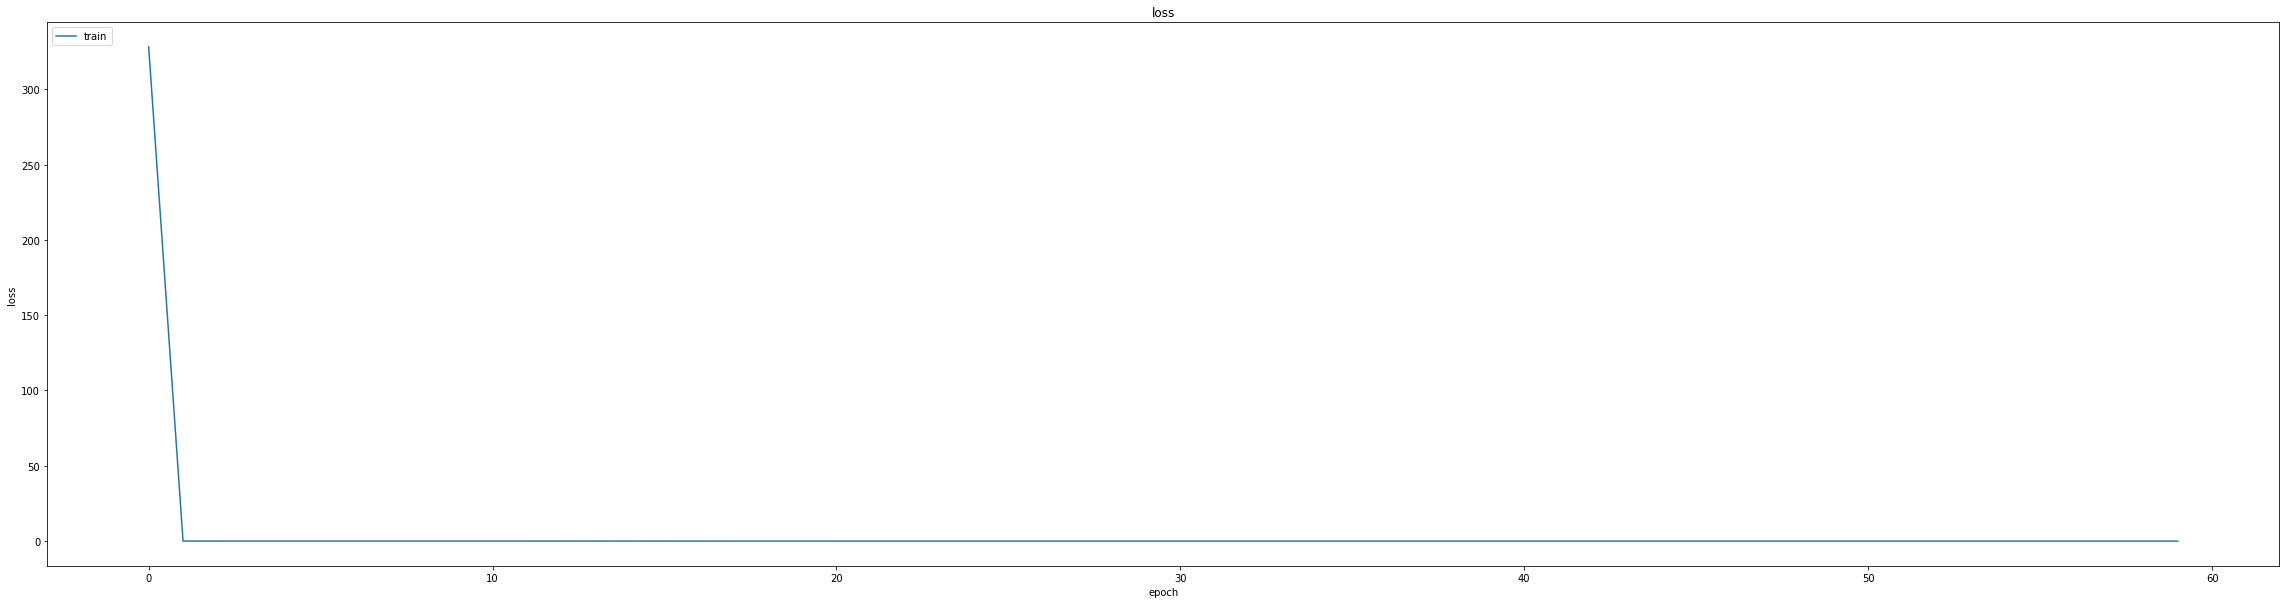

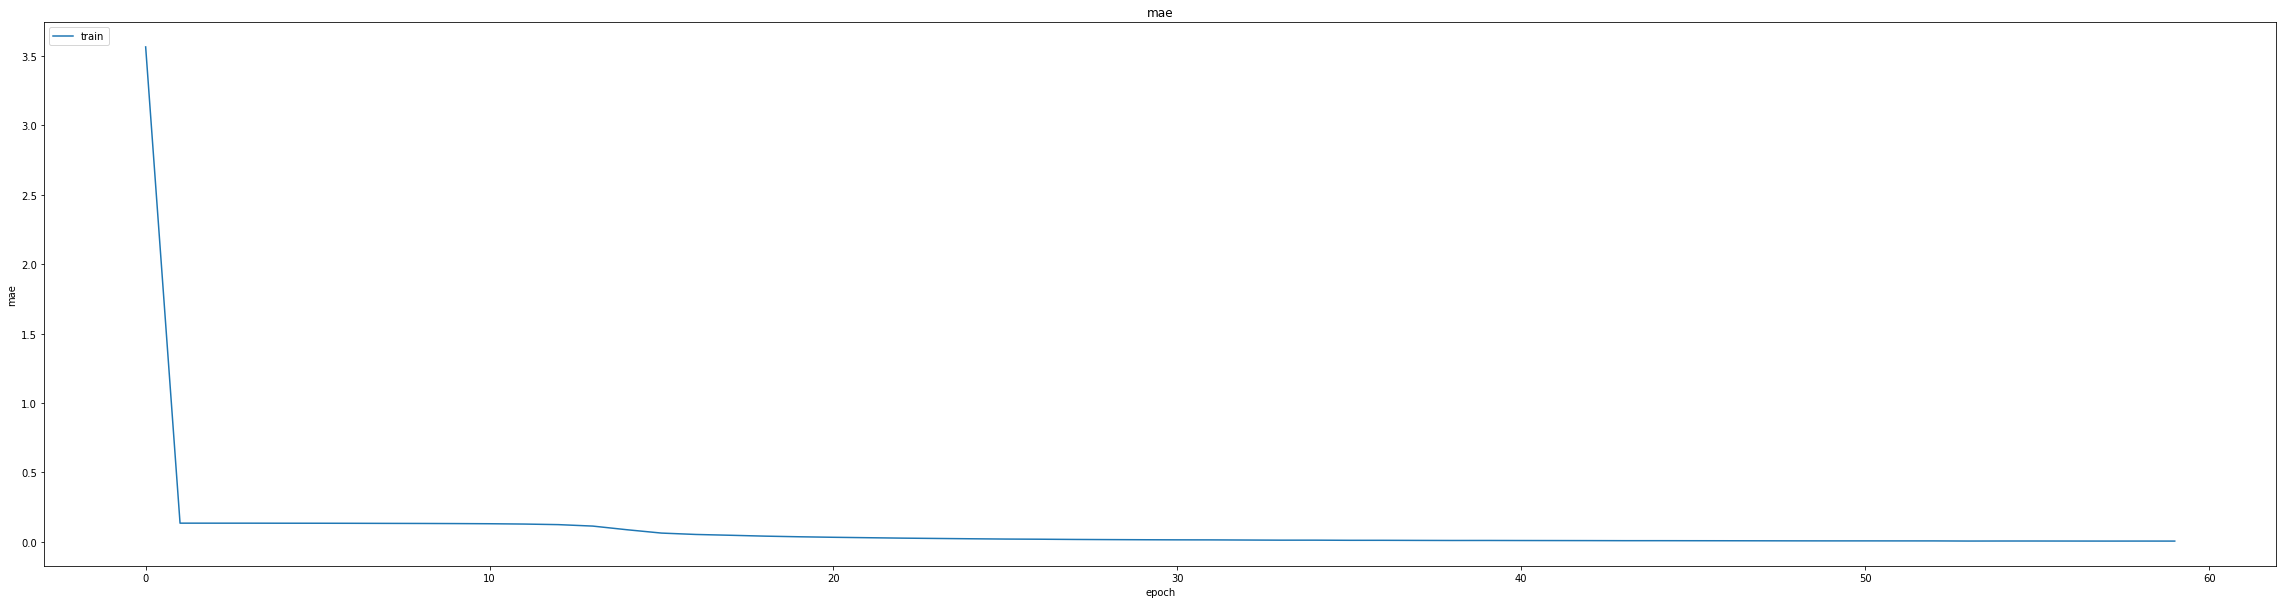

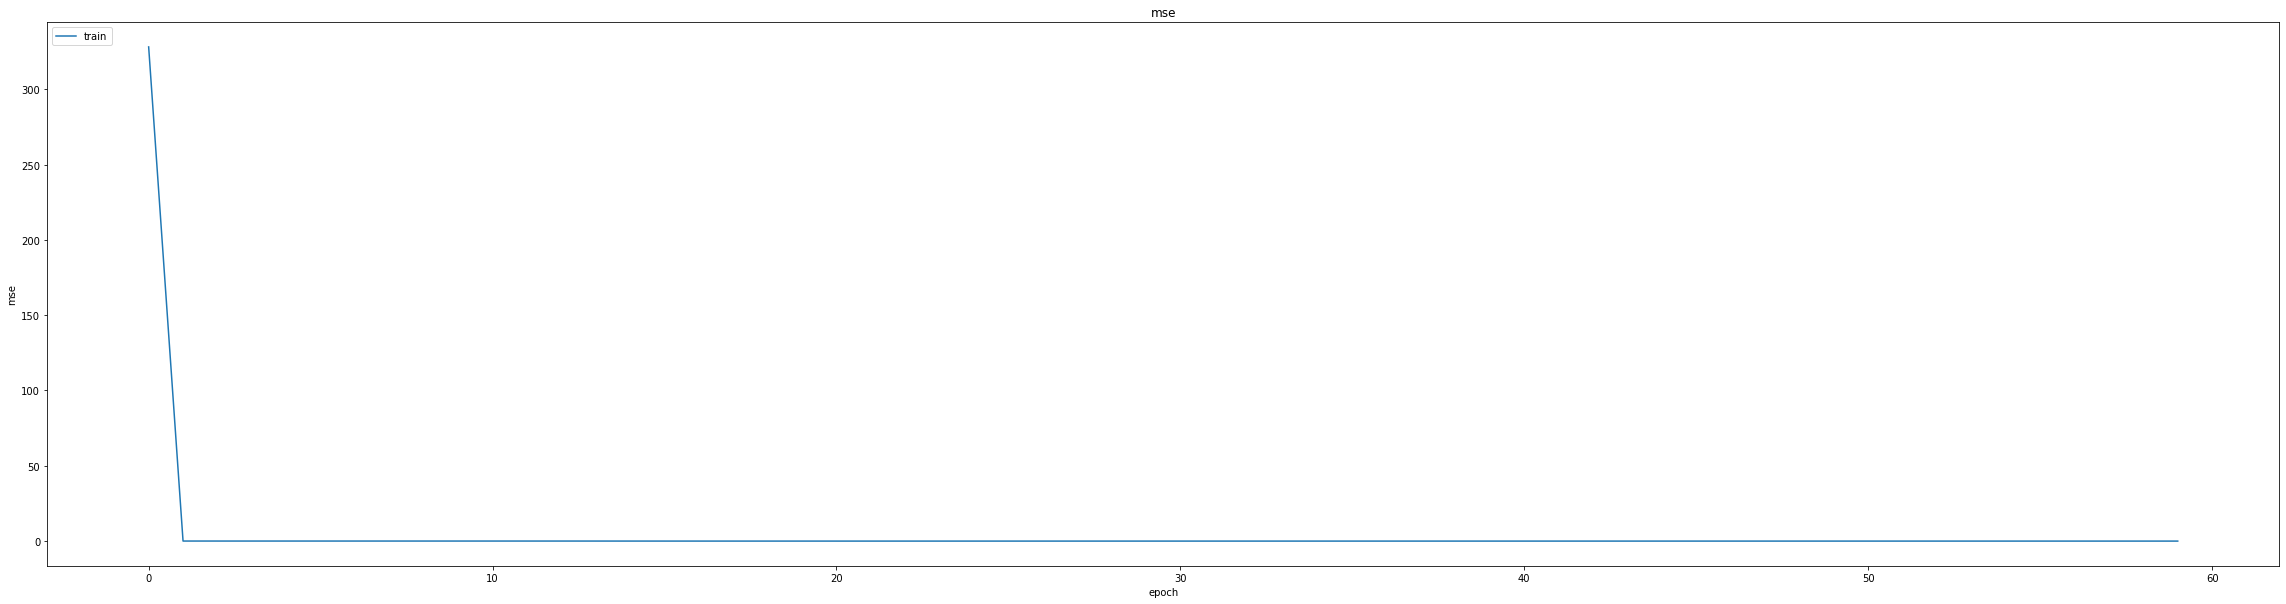

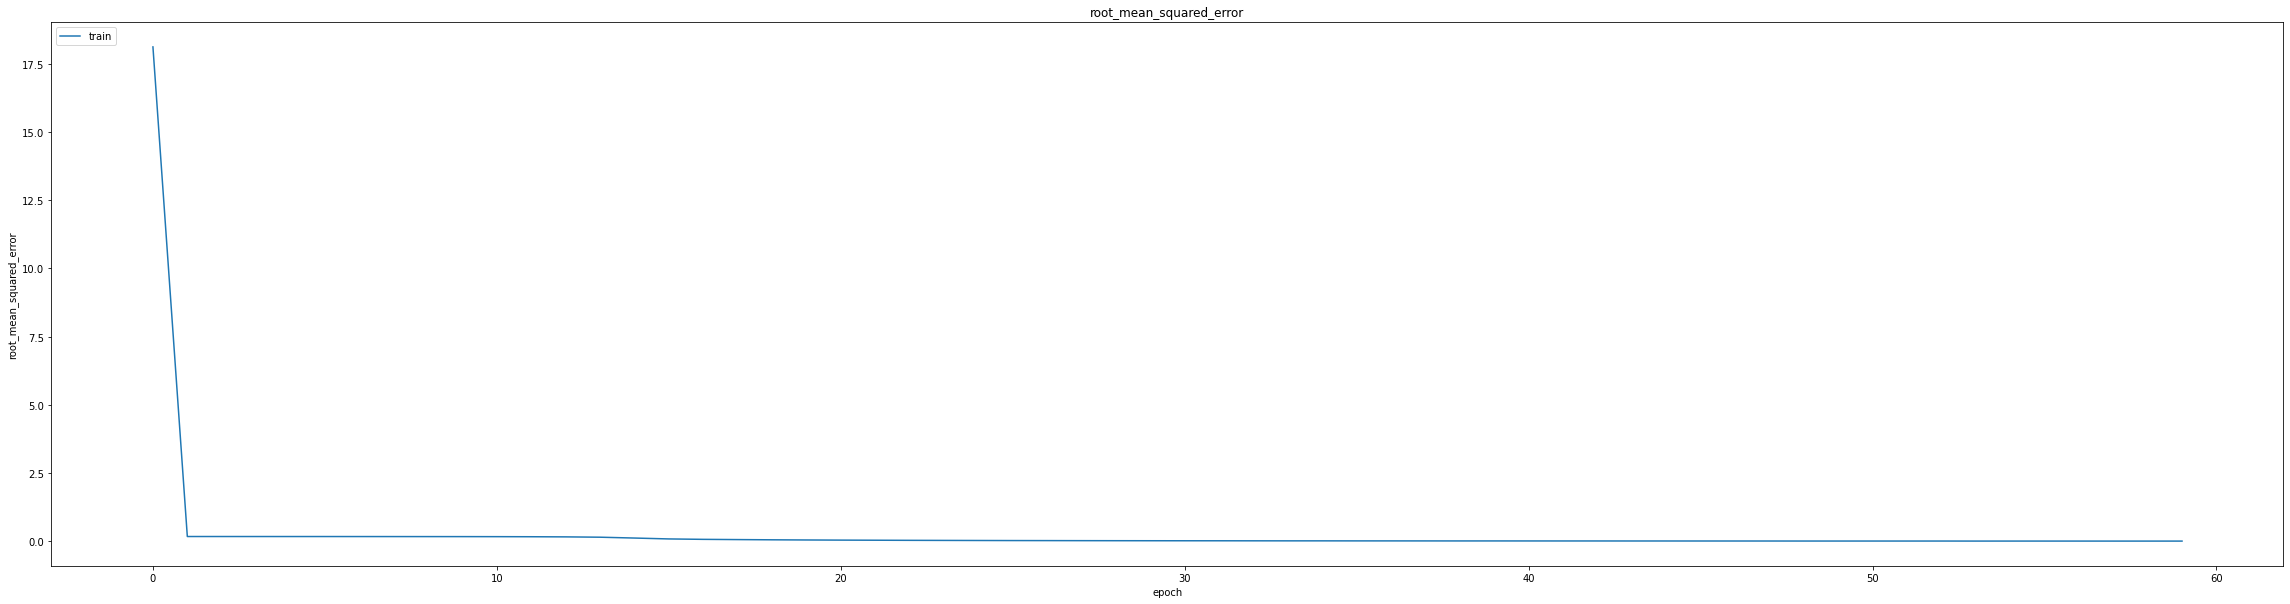

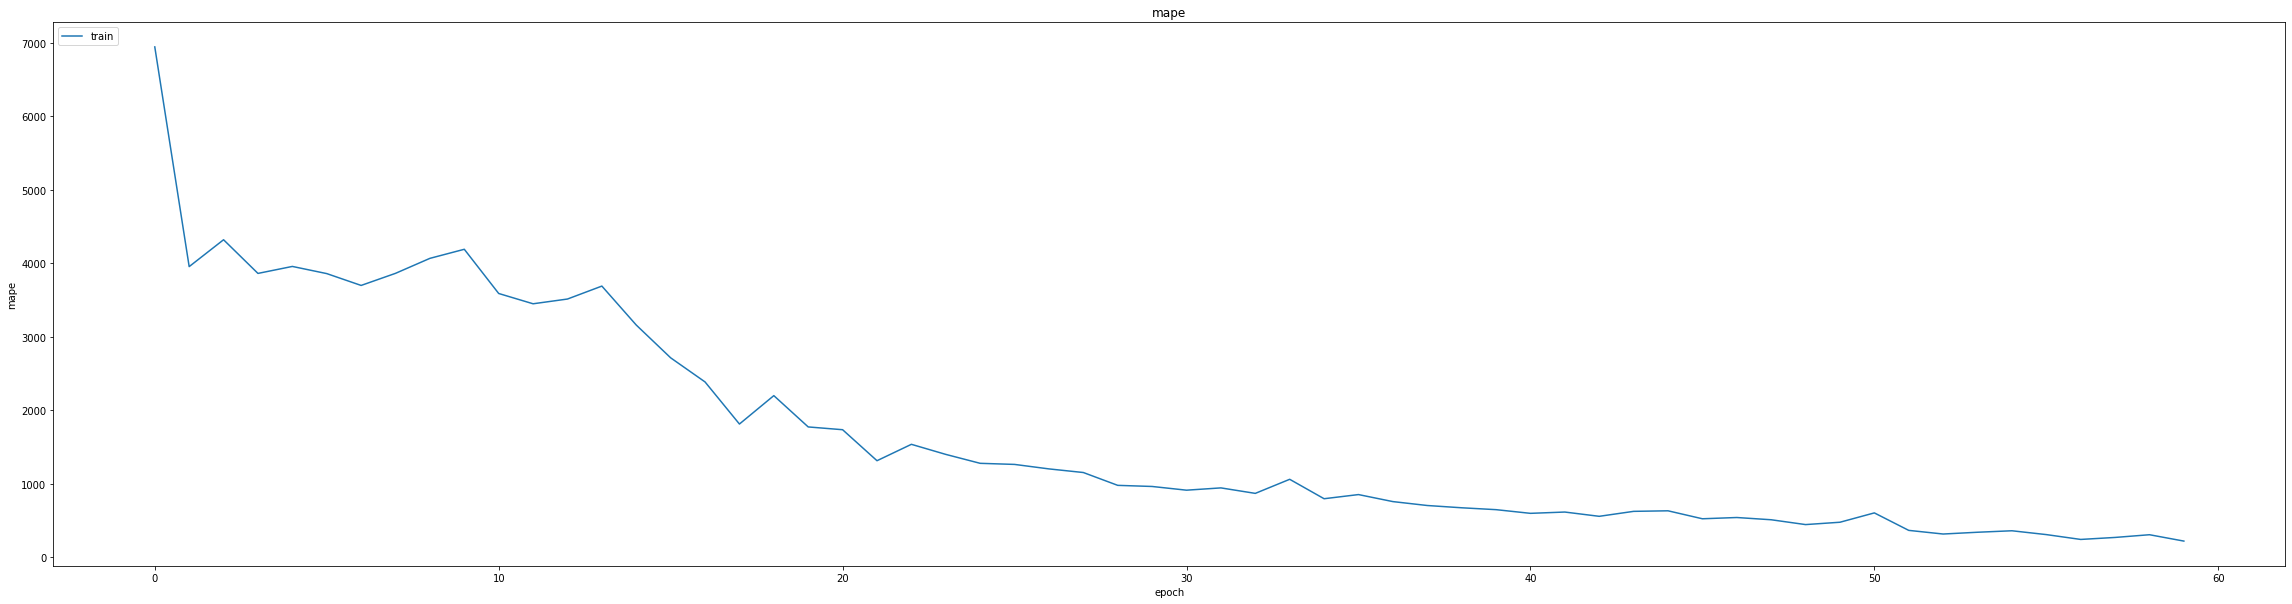

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01113091316074133
0.014826567843556404
687/687 [==============================] - 27s 36ms/step
0.9916159289109504


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=20
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 4.4563e-04 - mae: 0.0085 - mse: 4.4563e-04 - root_mean_squared_error: 0.0211 - mape: 642.2864
Epoch 1: val_mse did not improve from 0.00022
463/463 [==============================] - 307s 633ms/step - loss: 4.4563e-04 - mae: 0.0085 - mse: 4.4563e-04 - root_mean_squared_error: 0.0211 - mape: 642.2864 - val_loss: 3.3413e-04 - val_mae: 0.0155 - val_mse: 3.3413e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 3935.2500 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 2.5451e-05 - mae: 0.0038 - mse: 2.5451e-05 - root_mean_squared_error: 0.0050 - mape: 365.5212
Epoch 2: val_mse did not improve from 0.00022
463/463 [==============================] - 288s 622ms/step - loss: 2.5451e-05 - mae: 0.0038 - mse: 2.5451e-05 - root_mean_squared_error: 0.0050 - mape: 365.5212 - val_loss: 2.3067e-04 - val_mae: 0.0125 - val_mse: 2.3067e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3531.7292

463/463 [==============================] - 324s 701ms/step - loss: 3.6670e-05 - mae: 0.0047 - mse: 3.6670e-05 - root_mean_squared_error: 0.0061 - mape: 341.7770 - val_loss: 1.5934e-04 - val_mae: 0.0099 - val_mse: 1.5934e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 2727.2996 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
463/463 [==============================] - ETA: 0s - loss: 3.0310e-05 - mae: 0.0043 - mse: 3.0310e-05 - root_mean_squared_error: 0.0055 - mape: 292.4912
Epoch 5: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM


463/463 [==============================] - 329s 710ms/step - loss: 3.0310e-05 - mae: 0.0043 - mse: 3.0310e-05 - root_mean_squared_error: 0.0055 - mape: 292.4912 - val_loss: 1.5087e-04 - val_mae: 0.0096 - val_mse: 1.5087e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 3122.3105 - lr: 8.1000e-04
Epoch 6/20
463/463 [==============================] - ETA: 0s - loss: 4.1069e-05 - mae: 0.0051 - mse: 4.1069e-05 - root_mean_squared_error: 0.0064 - mape: 329.2379
Epoch 6: val_mse did not improve from 0.00015
463/463 [==============================] - 285s 615ms/step - loss: 4.1069e-05 - mae: 0.0051 - mse: 4.1069e-05 - root_mean_squared_error: 0.0064 - mape: 329.2379 - val_loss: 2.9947e-04 - val_mae: 0.0146 - val_mse: 2.9947e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2451.4309 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
463/463 [==============================] - ETA: 0s - loss: 2.7628e-05 - mae: 0.0041 - mse: 2.7628e-05 - root_mean_squared_error: 0.0053 - map

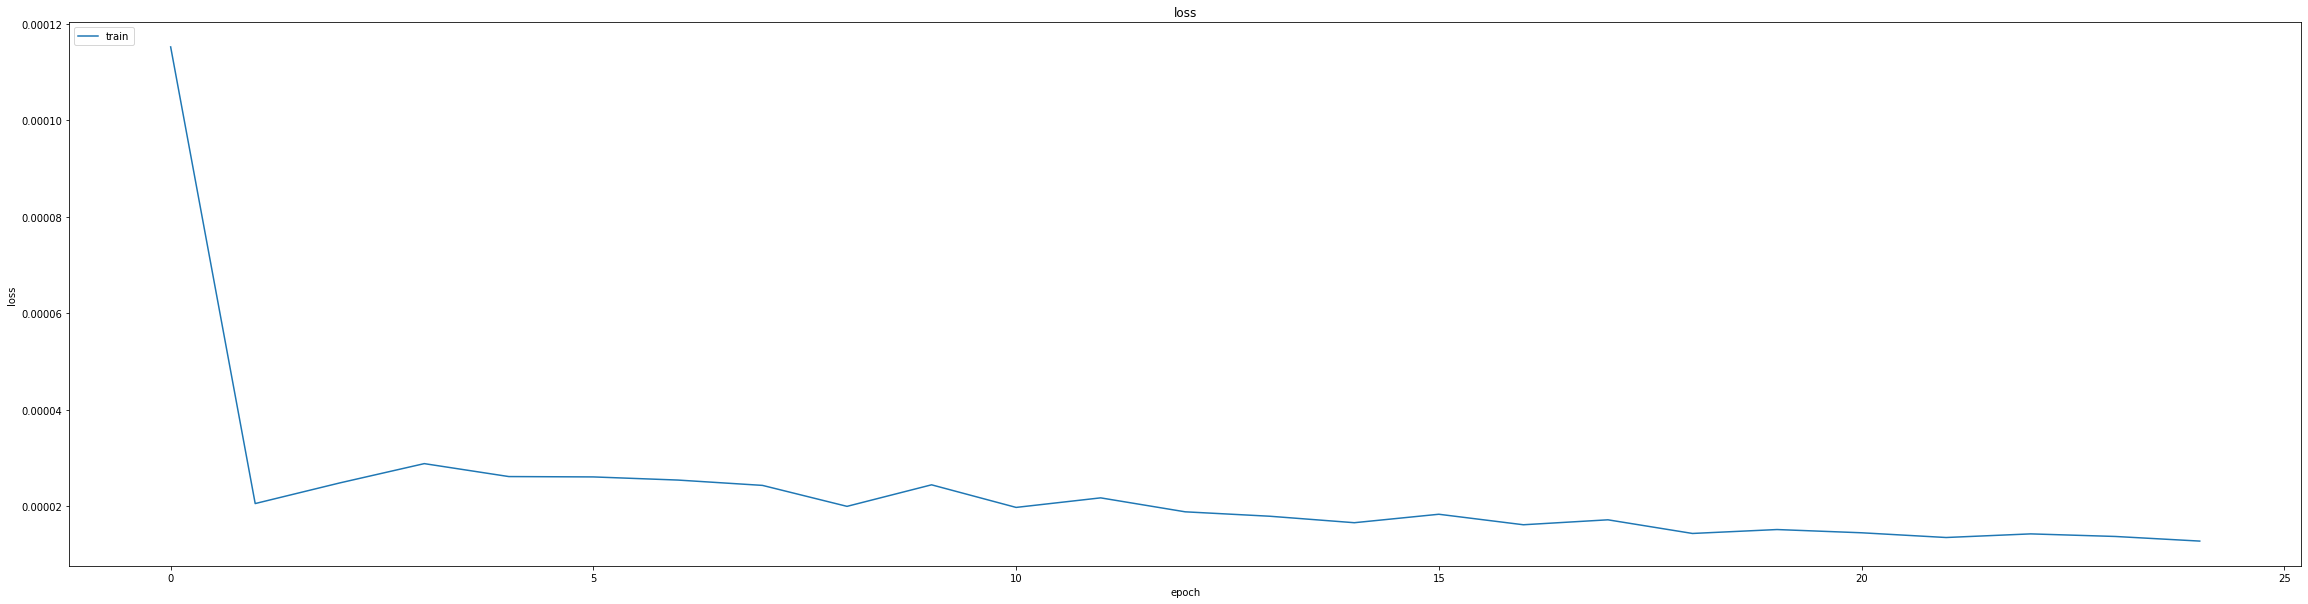

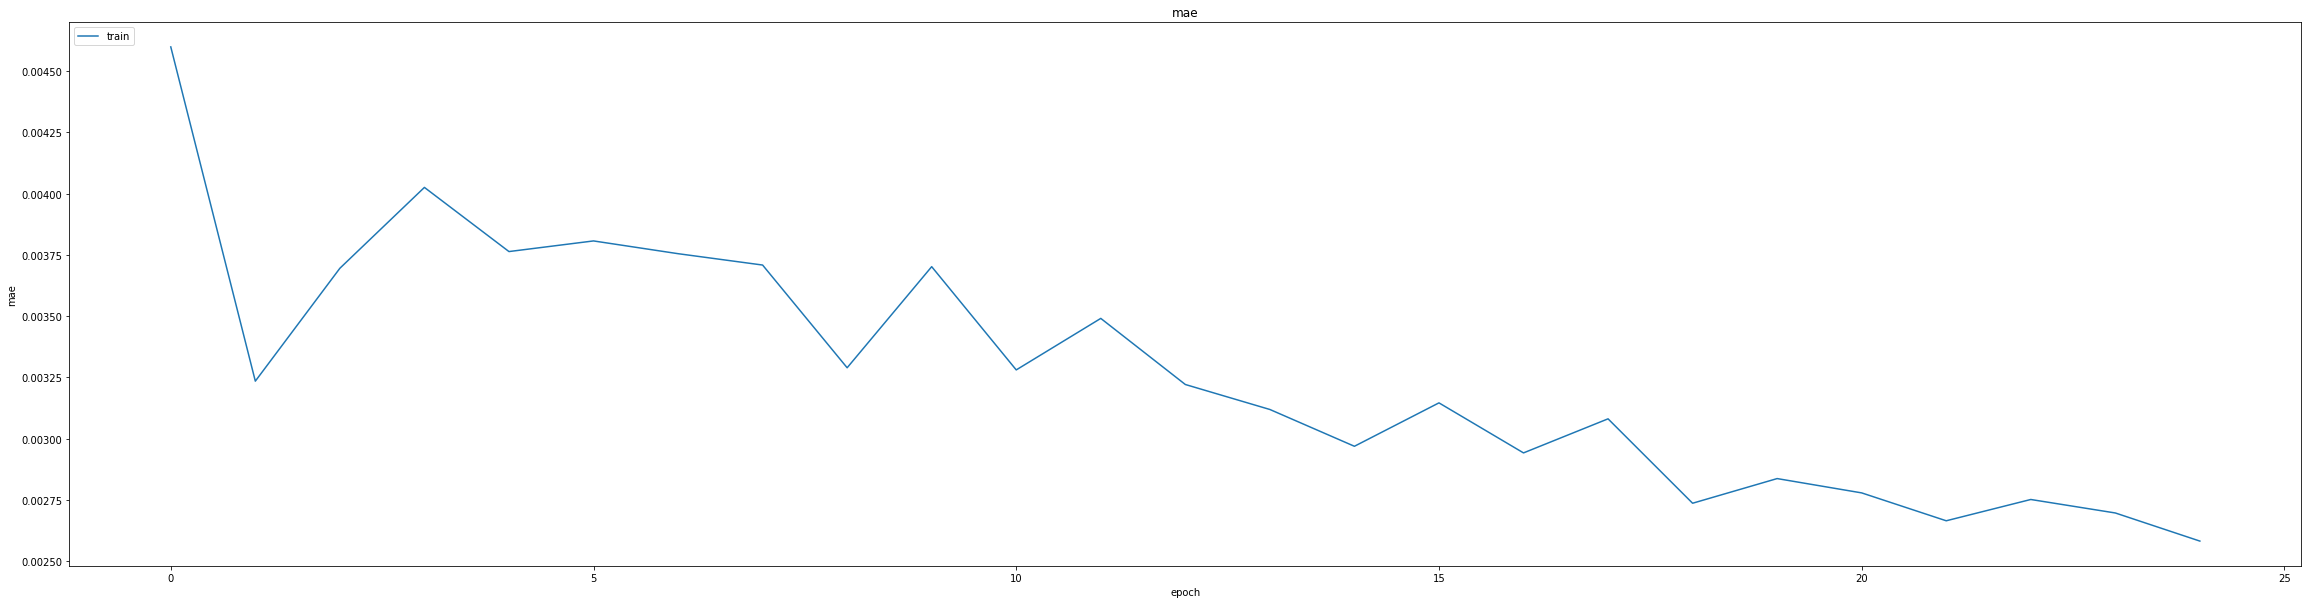

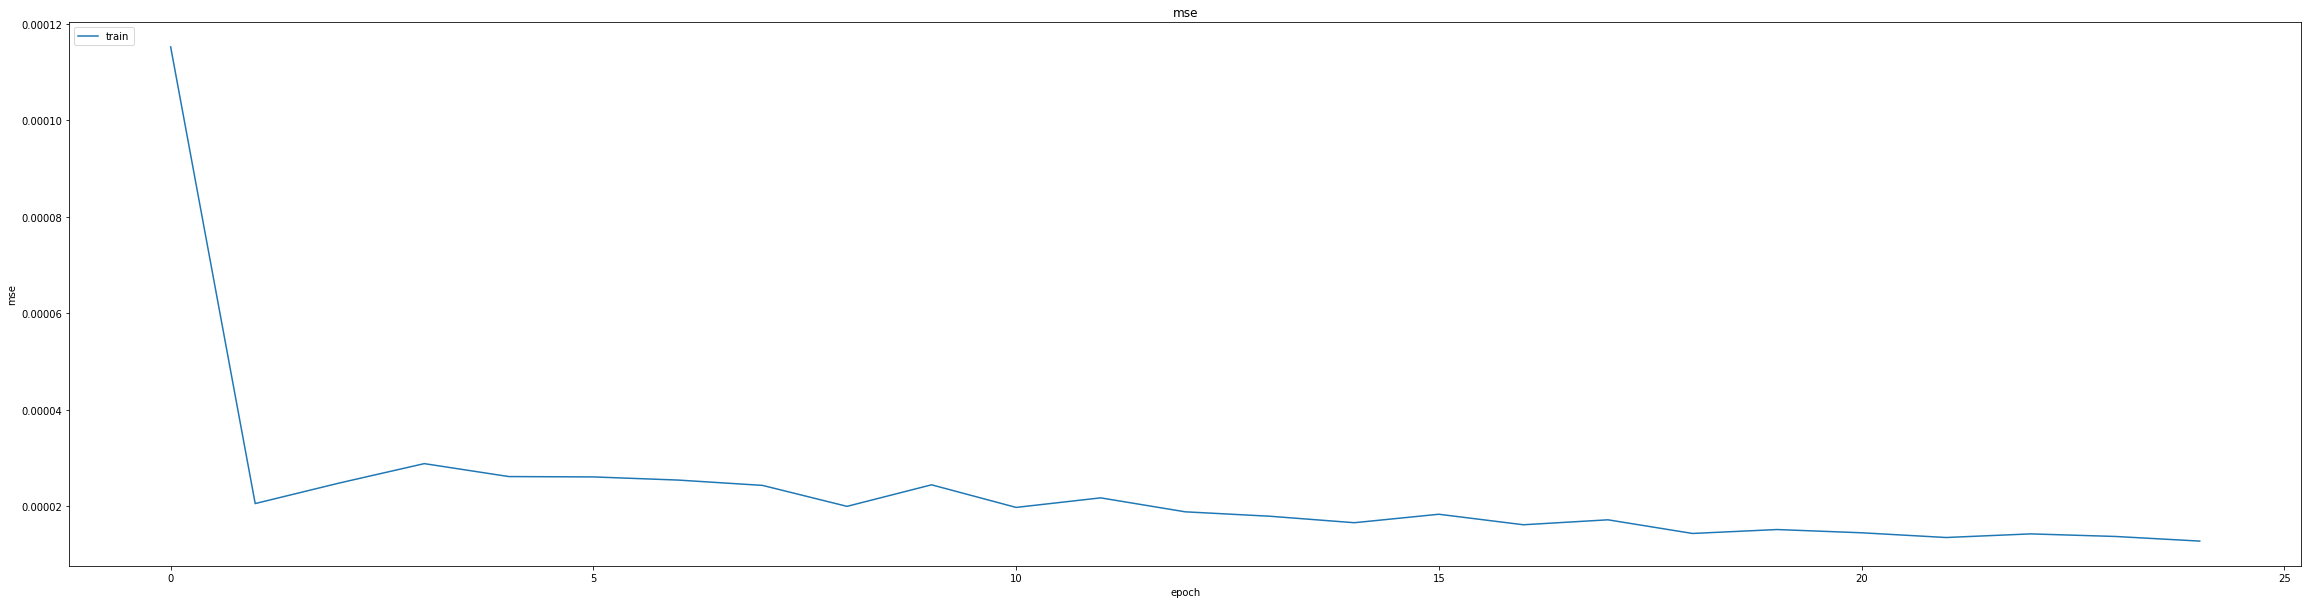

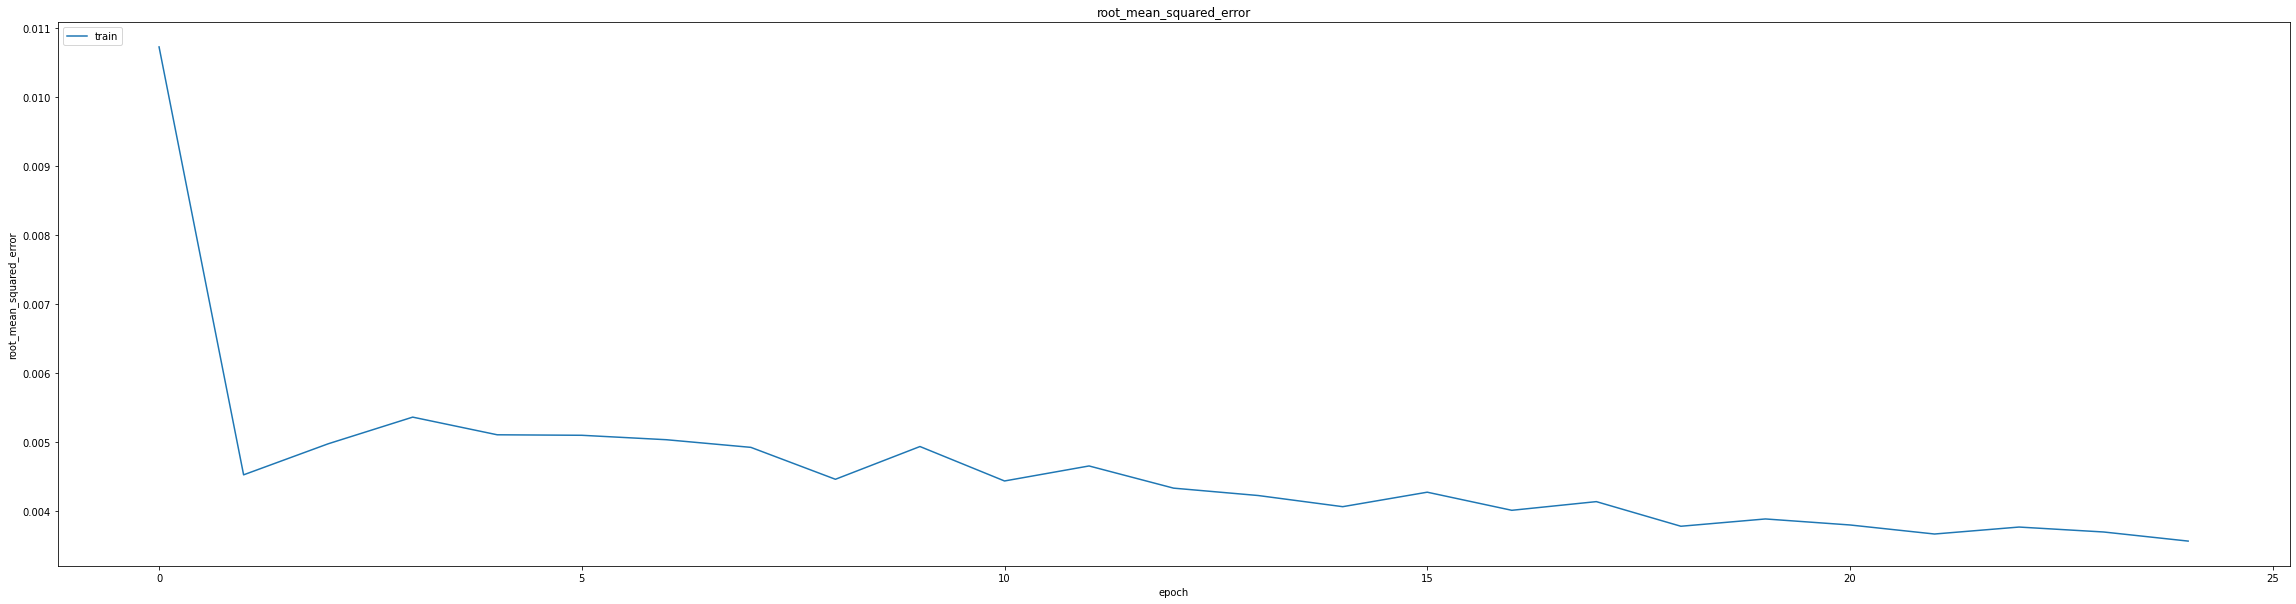

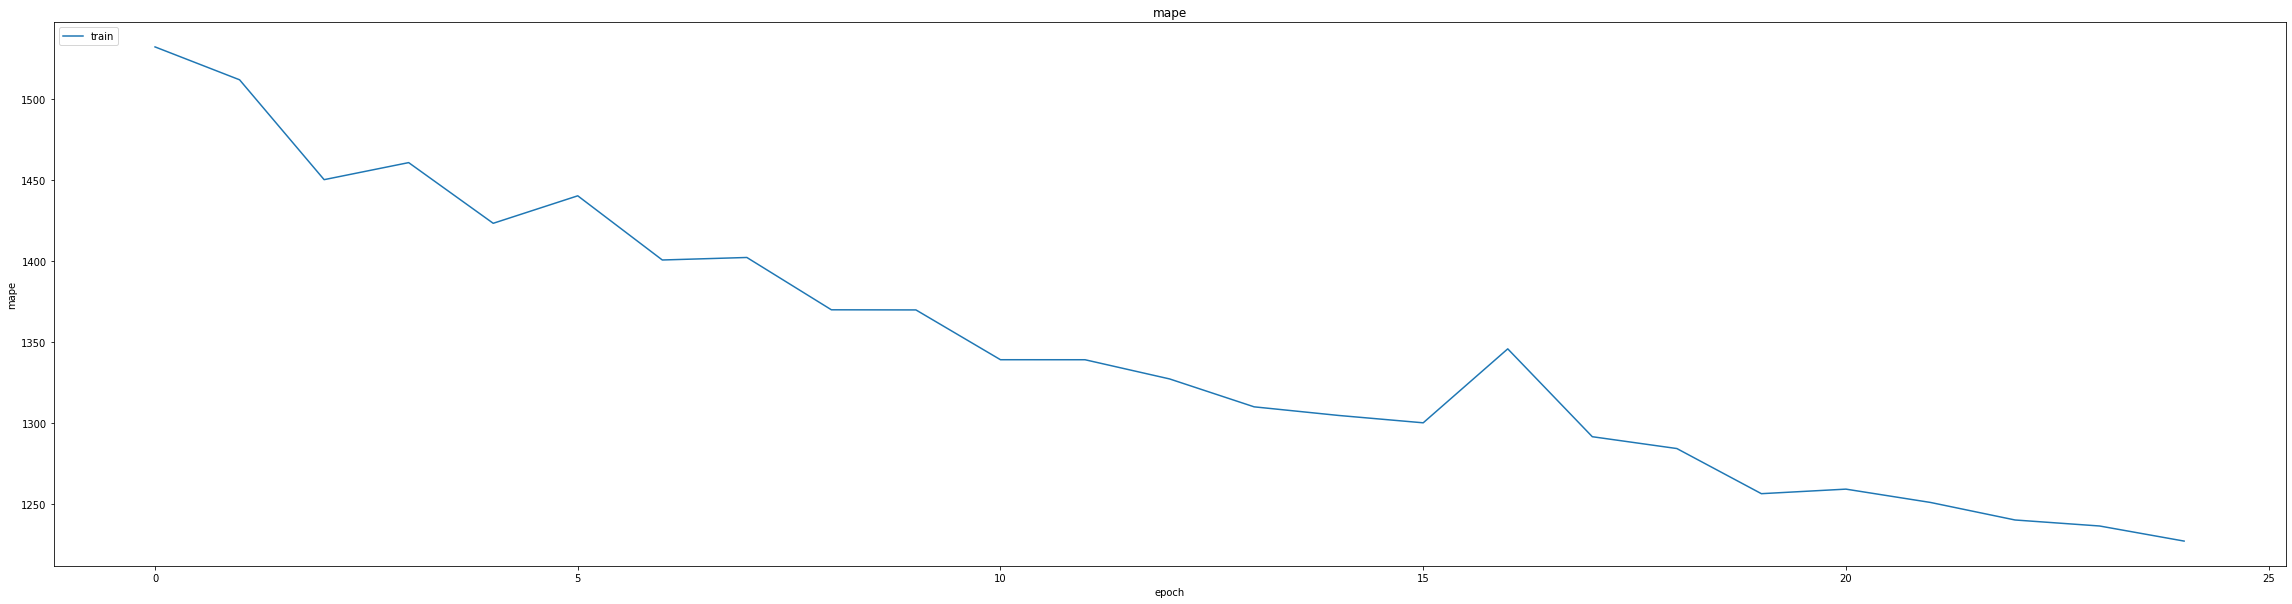

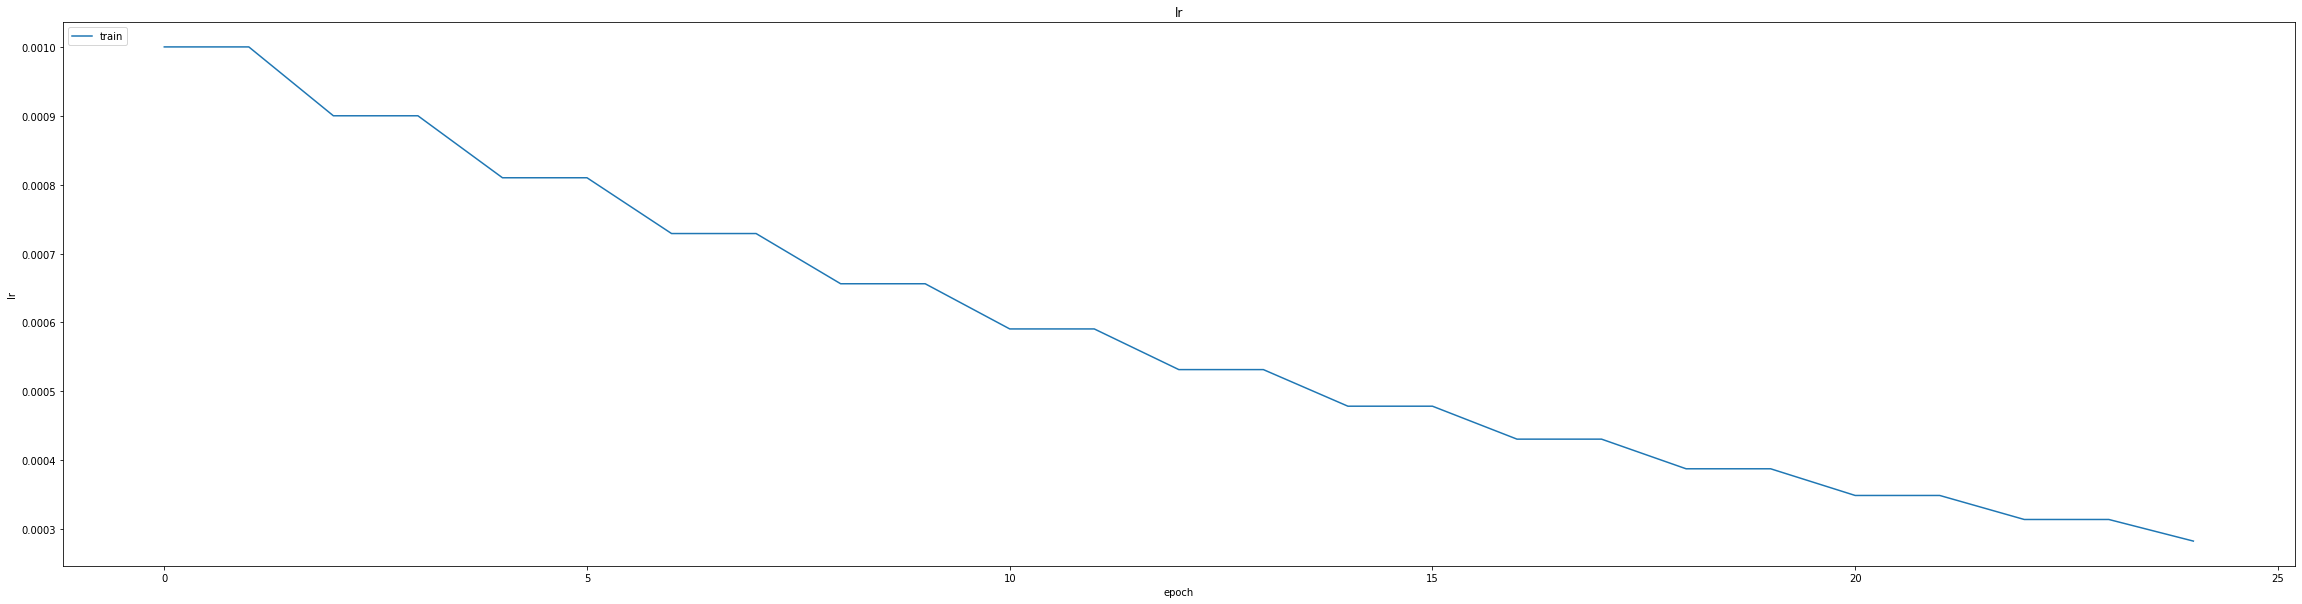

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009579753503203392
0.012282753363251686
687/687 [==============================] - 30s 37ms/step
0.9916351476225164


687/687 [==============================] - 27s 39ms/step


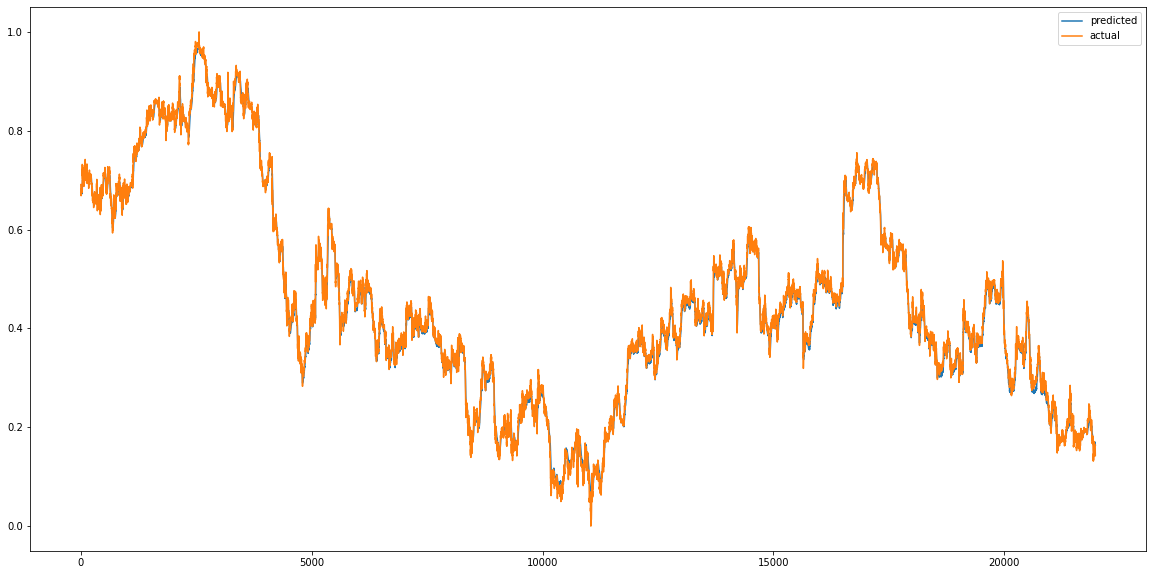

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD5_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


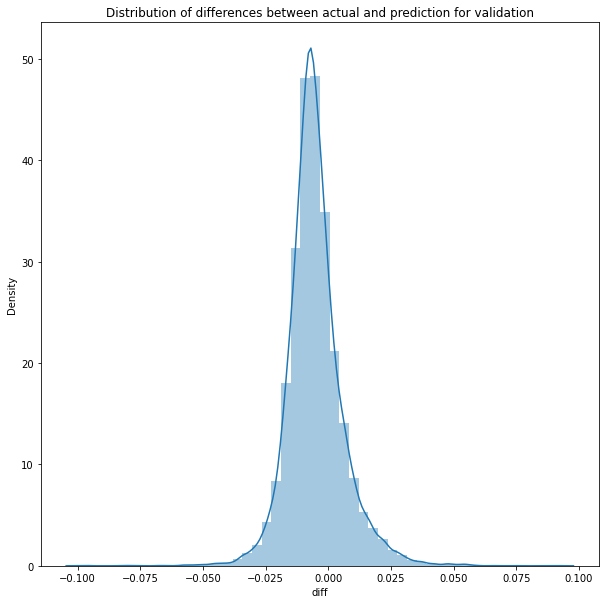

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 26s 37ms/step


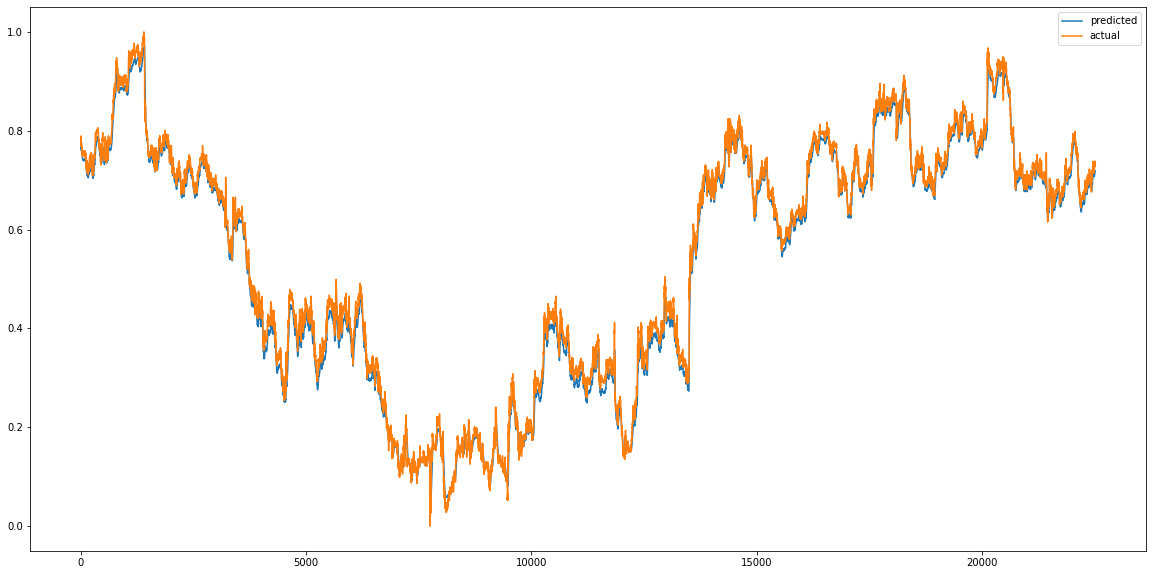

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


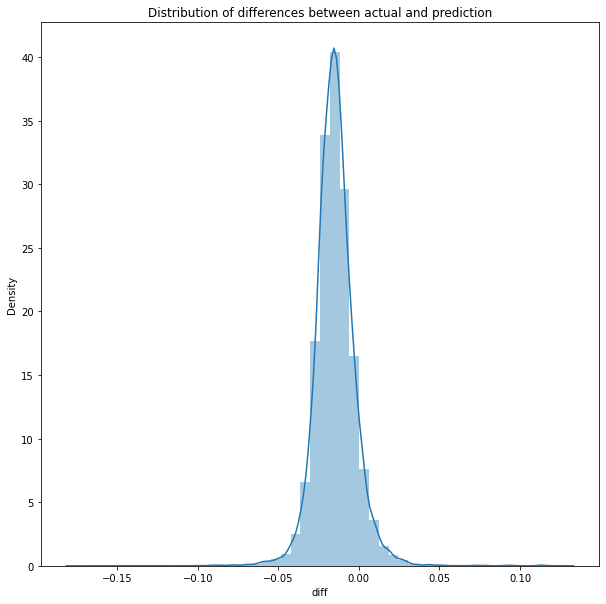

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00037903752440907393
MAE :  0.016429384028164185
RMSE  : 0.019468886059789706
704/704 [==============================] - 26s 37ms/step
R2_Score  : 0.9937949872421953


count    22513.000000
mean        -0.014736
std          0.012724
min         -0.176352
25%         -0.021770
50%         -0.015201
75%         -0.008311
max          0.128103
Name: diff, dtype: float64